In [1]:
!pip install -r 'requirements.txt'

  Using cached Wave-0.0.2.zip (38 kB)
  Preparing metadata (setup.py) ... done
  Using cached pytest_warnings-0.3.1-py2.py3-none-any.whl (3.7 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 kB 4.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 5.6 MB/s eta 0:00:00
  Created wheel for wave: filename=Wave-0.0.2-py3-none-any.whl size=1220 sha256=b7fd449d6eac2d9878ee4e0beaa345e7a428199f8fe1bfb66630edfb5e3e8841
  Stored in directory: /home/studio-lab-user/.cache/pip/wheels/ee/3e/b3/bdee8d885ec04fd42bd239e9d9ab9dc94e69aad318c0d9936c
Successfully built wave


In [2]:
#Download the dataset.
!wget 'https://storage.googleapis.com/kimata/datasets/speech/mnist_audio.zip'

--2022-07-01 13:25:09--  https://storage.googleapis.com/kimata/datasets/speech/mnist_audio.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.1.112, 172.217.0.176, 142.250.190.144, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.1.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16486421 (16M) [application/zip]
Saving to: 'mnist_audio.zip'

mnist_audio.zip     100%[===================>]  15.72M  70.9MB/s    in 0.2s    

2022-07-01 13:25:09 (70.9 MB/s) - 'mnist_audio.zip' saved [16486421/16486421]



In [3]:
import os
import wave
import zipfile
import numpy as np
from scipy import signal
from scipy.io import wavfile
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from matplotlib.backend_bases import RendererBase

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Extract dataset.
zip_ref = zipfile.ZipFile('mnist_audio.zip', 'r')
zip_ref.extractall()
zip_ref.close()
print('Done extracting zip file.')

Done extracting zip file.


#### View the basic attributes of a _wav_ file. These attributes are:

- Sound channel
- Sampling width
- Frame rate
- Number of frames
- Unique ID
- Lossless information

In [5]:
#View basic attributes of a wav file.
FILENAME = 'free-spoken-digit-dataset-master/recordings/0_george_0.wav'
WAVE = wave.open(FILENAME)

a = WAVE.getparams().nframes #Total number of frames.
print(a)

2384


In [6]:
f = WAVE.getparams().framerate #Sampling frequency.
print(f'Sampling frequency is: {f}')

Sampling frequency is: 8000


In [7]:
sample_time = 1 / f #Interval of sampling points.
time = a / f
sample_frquency, audio_sequence = wavfile.read(FILENAME)
x_seq = np.arange(0, time, sample_time)

print(f'Audio sequence is: {audio_sequence}')
print(f'\nAudio sequence length is: {len(audio_sequence)}')
print(x_seq, len(x_seq))

Audio sequence is: [-1489  -962  -606 ... -1814 -1110   -15]

Audio sequence length is: 2384
[0.00000e+00 1.25000e-04 2.50000e-04 ... 2.97625e-01 2.97750e-01
 2.97875e-01] 2384


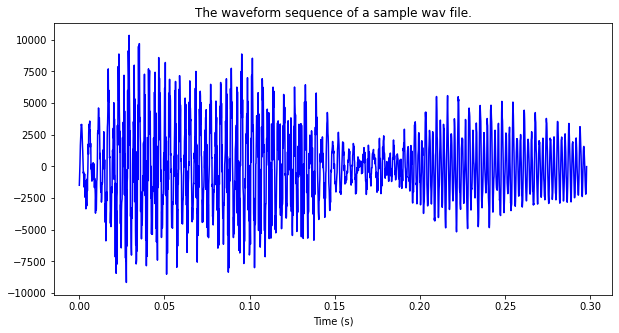

In [8]:
#View the waveform sequence of the wav file.
plt.figure(figsize = (10, 5))
plt.plot(x_seq, audio_sequence, 'blue')
plt.title('The waveform sequence of a sample wav file.')
plt.xlabel('Time (s)')
plt.show()

In [9]:
audio_path = 'free-spoken-digit-dataset-master/recordings'
audio_files = 0
audio_classes = []

for item in os.listdir(audio_path):
    wav_file = str(item)
    wav_class = wav_file.split(sep = '_')[0]
    audio_classes.append(wav_class)
    audio_files += 1

    
unique_audio_classes = np.unique(audio_classes).astype('object')

# View the name and number of files.
print(f'Unique classes are: {unique_audio_classes.tolist()}')
print(f'Length of wav files is: {audio_files}')

Unique classes are: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
Length of wav files is: 3000


In [10]:
#Create a spectrum processing function.
def log_specgram(audio, sample_rate, window_size = 20, 
                 step_size = 10, eps = 1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, _, spec = signal.spectrogram(audio, fs = sample_rate,
                                        window = 'hann', nperseg = nperseg,
                                        noverlap = noverlap, detrend = False)
    
    return (freqs, np.log(spec.T.astype(np.float32) + eps))

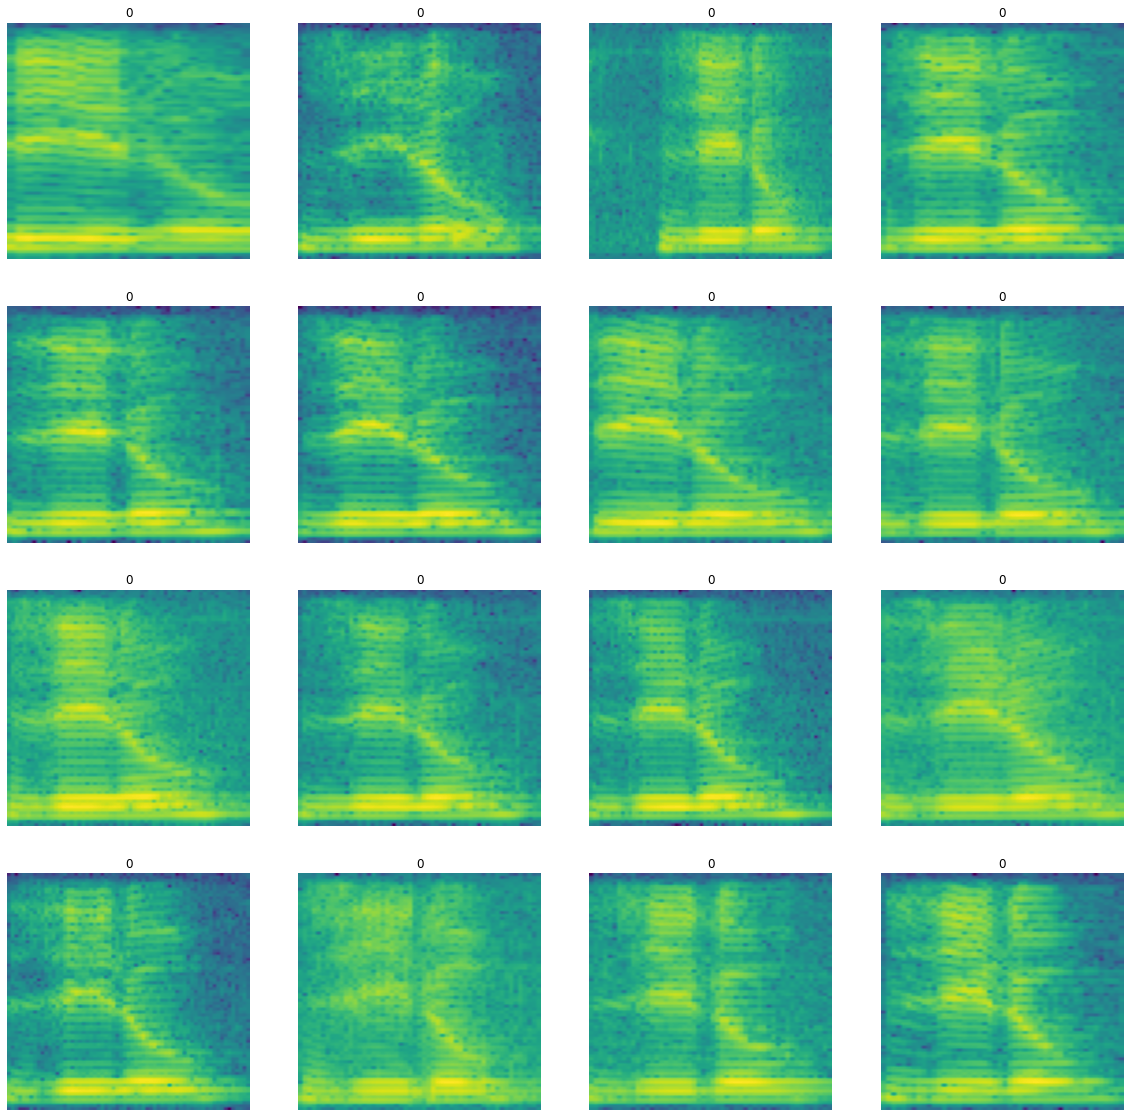

In [12]:
#Visualize one spectrum of multiple samples.
fig = plt.figure(figsize = (20, 20))
sample_audio = os.listdir(audio_path)

for item, file_path in enumerate(sample_audio[:16]):
    file_dir = os.path.join(audio_path, file_path)
    plt.subplot(4, 4, item + 1)
    
    #labels.
    label = file_path.split(sep = '_')[0]
    plt.title(label)
    
    # Create the spectogram.
    sample_rate, test_sound = wavfile.read(file_dir)
    _, spectogram = log_specgram(test_sound, sample_rate)
    
    plt.imshow(spectogram.T, aspect = 'auto', origin = 'lower')
    plt.axis('off')
plt.show()

### Visualize waveforms of multiple samples.

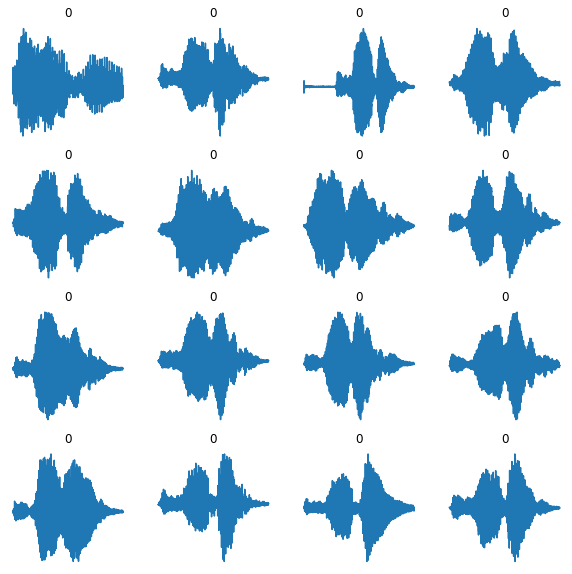

In [13]:
fig = plt.figure(figsize = (10, 10))

for item, file_path in enumerate(sample_audio[:16]):
    plt.subplot(4, 4, item + 1)
    file_dir = os.path.join(audio_path, file_path)
    sample_rate, test_sound = wavfile.read(file_dir)
    
    plt.title(file_path.split(sep = '_')[0])
    plt.axis('off')
    plt.plot(test_sound)
plt.show()

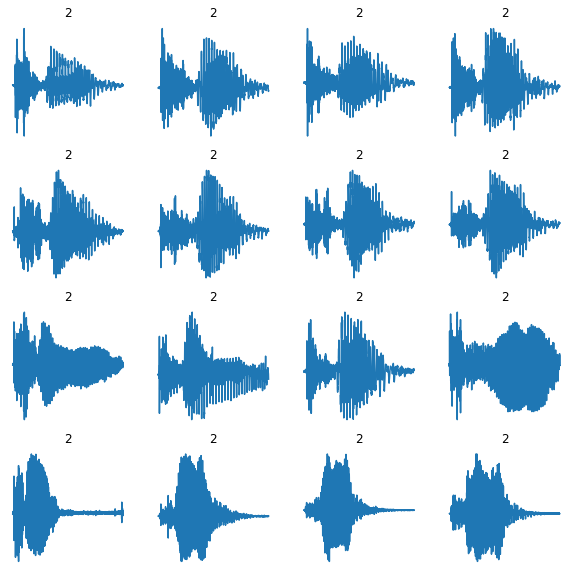

In [14]:
fig = plt.figure(figsize = (10, 10))

for item, file_path in enumerate(sample_audio[800:816]):
    plt.subplot(4, 4, item + 1)
    file_dir = os.path.join(audio_path, file_path)
    sample_rate, test_sound = wavfile.read(file_dir)
    
    plt.title(file_path.split(sep = '_')[0])
    plt.axis('off')
    plt.plot(test_sound)
plt.show()